In [1]:
import json
import pandas as pd
import requests
from ipywidgets import Image
import math
import re
import operator
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def dict_sort_des(diction):
    sorted_d = sorted(diction.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_d

def wordcloud_plot(text, colour):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = colour,
        stopwords = STOPWORDS).generate(str(text))

    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    return plt.show()

def clean_tweet(tweet):
    return ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [21]:
with open('incindia.json', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)

In [22]:
max_like = -100
maxl_index = -1
max_comments = -100
maxc_index = -1
for k in obj['posts']:
    l = k['likes']['count']
    if (l) > max_like:
        max_like = l
        maxl_index = obj['posts'].index(k)
    if k['comments']['count']>max_comments:
        max_comments = k['comments']['count']
        maxc_index = obj['posts'].index(k)
print("Most liked post ID:", obj['posts'][maxl_index]['url'].split('/')[-2])
print("Most commented post ID:",obj['posts'][maxc_index]['url'].split('/')[-2])

Most liked post ID: Bs-IxK3FTIx
Most commented post ID: BvThii1FXva


## Most liked post.

In [5]:
Image(value=requests.get(obj['posts'][maxl_index]['preview_img']).content)

## Most commented post.

In [6]:
Image(value=requests.get(obj['posts'][maxc_index]['preview_img']).content)

## Popularity score -> log(views)+log(likes)+comments

In [24]:
post_list = obj['posts']
top_five_indices = []
for j in range(5):
    max_score = -100
    max_index = -1
    for k in post_list:
#         print(k)
        l = math.log(k['likes']['count']+1) + math.log(k['views']+1)+k['comments']['count']
        if l>max_score:
            max_score = l
            max_index = obj['posts'].index(k)
    top_five_indices.append(obj['posts'][max_index])
    post_list.remove(obj['posts'][max_index])

In [25]:
for k in top_five_indices:
    display(Image(value=requests.get(k['preview_img']).content))
    print(k['url'])

https://www.instagram.com/p/Bvq9BVglw9s/
https://www.instagram.com/p/Bu_EcqUlfaY/
https://www.instagram.com/p/BvqOW3EFjG4/
https://www.instagram.com/p/ButZczFlPvG/
https://www.instagram.com/p/BrVjX9HFyA6/


In [9]:
hash_list = []
for k in obj['posts']:
    if len(k['comments']['list']):
        text = k['comments']['list'][0]['comment']
        hash_list.extend(re.findall(r"#(\w+)", text))
hash_dict = {}
for j in hash_list:
        if j not in hash_dict.keys():
            hash_dict[j] = 1
        else:
            hash_dict[j] += 1
print(dict_sort_des(hash_dict)[:5])

[('Congress', 56), ('India', 33), ('NoMo', 23), ('BJP', 20), ('CongressManifesto2019', 17)]


In [10]:
with open('bjp4india.json', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)

In [11]:
video_count = 0 
for k in obj['posts']:
    if not len(k['imgs']):
        video_count += 1
"There are "+str(video_count) + " video posts."

'There are 291 video posts.'

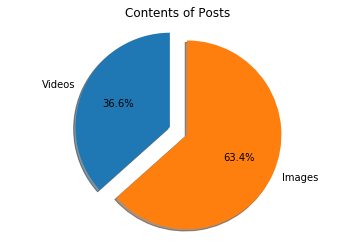

In [12]:
labels = ['Videos', 'Images']
sizes = [video_count, len(obj['posts'])-video_count]
explode = (0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('Contents of Posts')
plt.show()

In [13]:
post_list = obj['posts']
top_200_indices = []
for j in range(200):
    max_score = -100
    max_index = -1
    for k in obj['posts']:
        l = math.log(k['likes']['count']+1) + math.log(k['views']+1)+k['comments']['count']
        if l>max_score:
            max_score = l
            max_index = obj['posts'].index(k)
    top_200_indices.append(max_index)
    del post_list[max_index]
print(top_200_indices)

[794, 548, 486, 556, 236, 737, 697, 627, 142, 516, 384, 628, 529, 345, 573, 672, 201, 364, 740, 640, 664, 734, 770, 233, 127, 572, 675, 420, 461, 533, 510, 98, 226, 467, 664, 553, 474, 353, 414, 686, 133, 371, 491, 556, 686, 717, 344, 573, 138, 370, 69, 407, 194, 269, 262, 543, 523, 449, 498, 621, 725, 308, 490, 19, 680, 20, 674, 392, 307, 475, 448, 591, 344, 401, 452, 359, 595, 263, 51, 654, 683, 267, 118, 219, 669, 486, 703, 569, 190, 487, 541, 479, 477, 273, 255, 114, 60, 0, 543, 421, 458, 183, 566, 663, 521, 520, 494, 258, 512, 373, 588, 16, 422, 534, 583, 529, 529, 610, 80, 209, 416, 633, 471, 11, 155, 108, 568, 160, 599, 119, 549, 327, 371, 477, 436, 339, 519, 475, 303, 507, 559, 525, 490, 541, 28, 585, 18, 328, 326, 595, 413, 489, 621, 499, 417, 113, 239, 535, 240, 494, 305, 251, 604, 630, 7, 28, 368, 495, 552, 197, 558, 487, 533, 397, 483, 490, 515, 21, 7, 84, 431, 389, 74, 104, 523, 153, 552, 101, 351, 111, 76, 459, 82, 58, 512, 487, 139, 536, 82, 389]


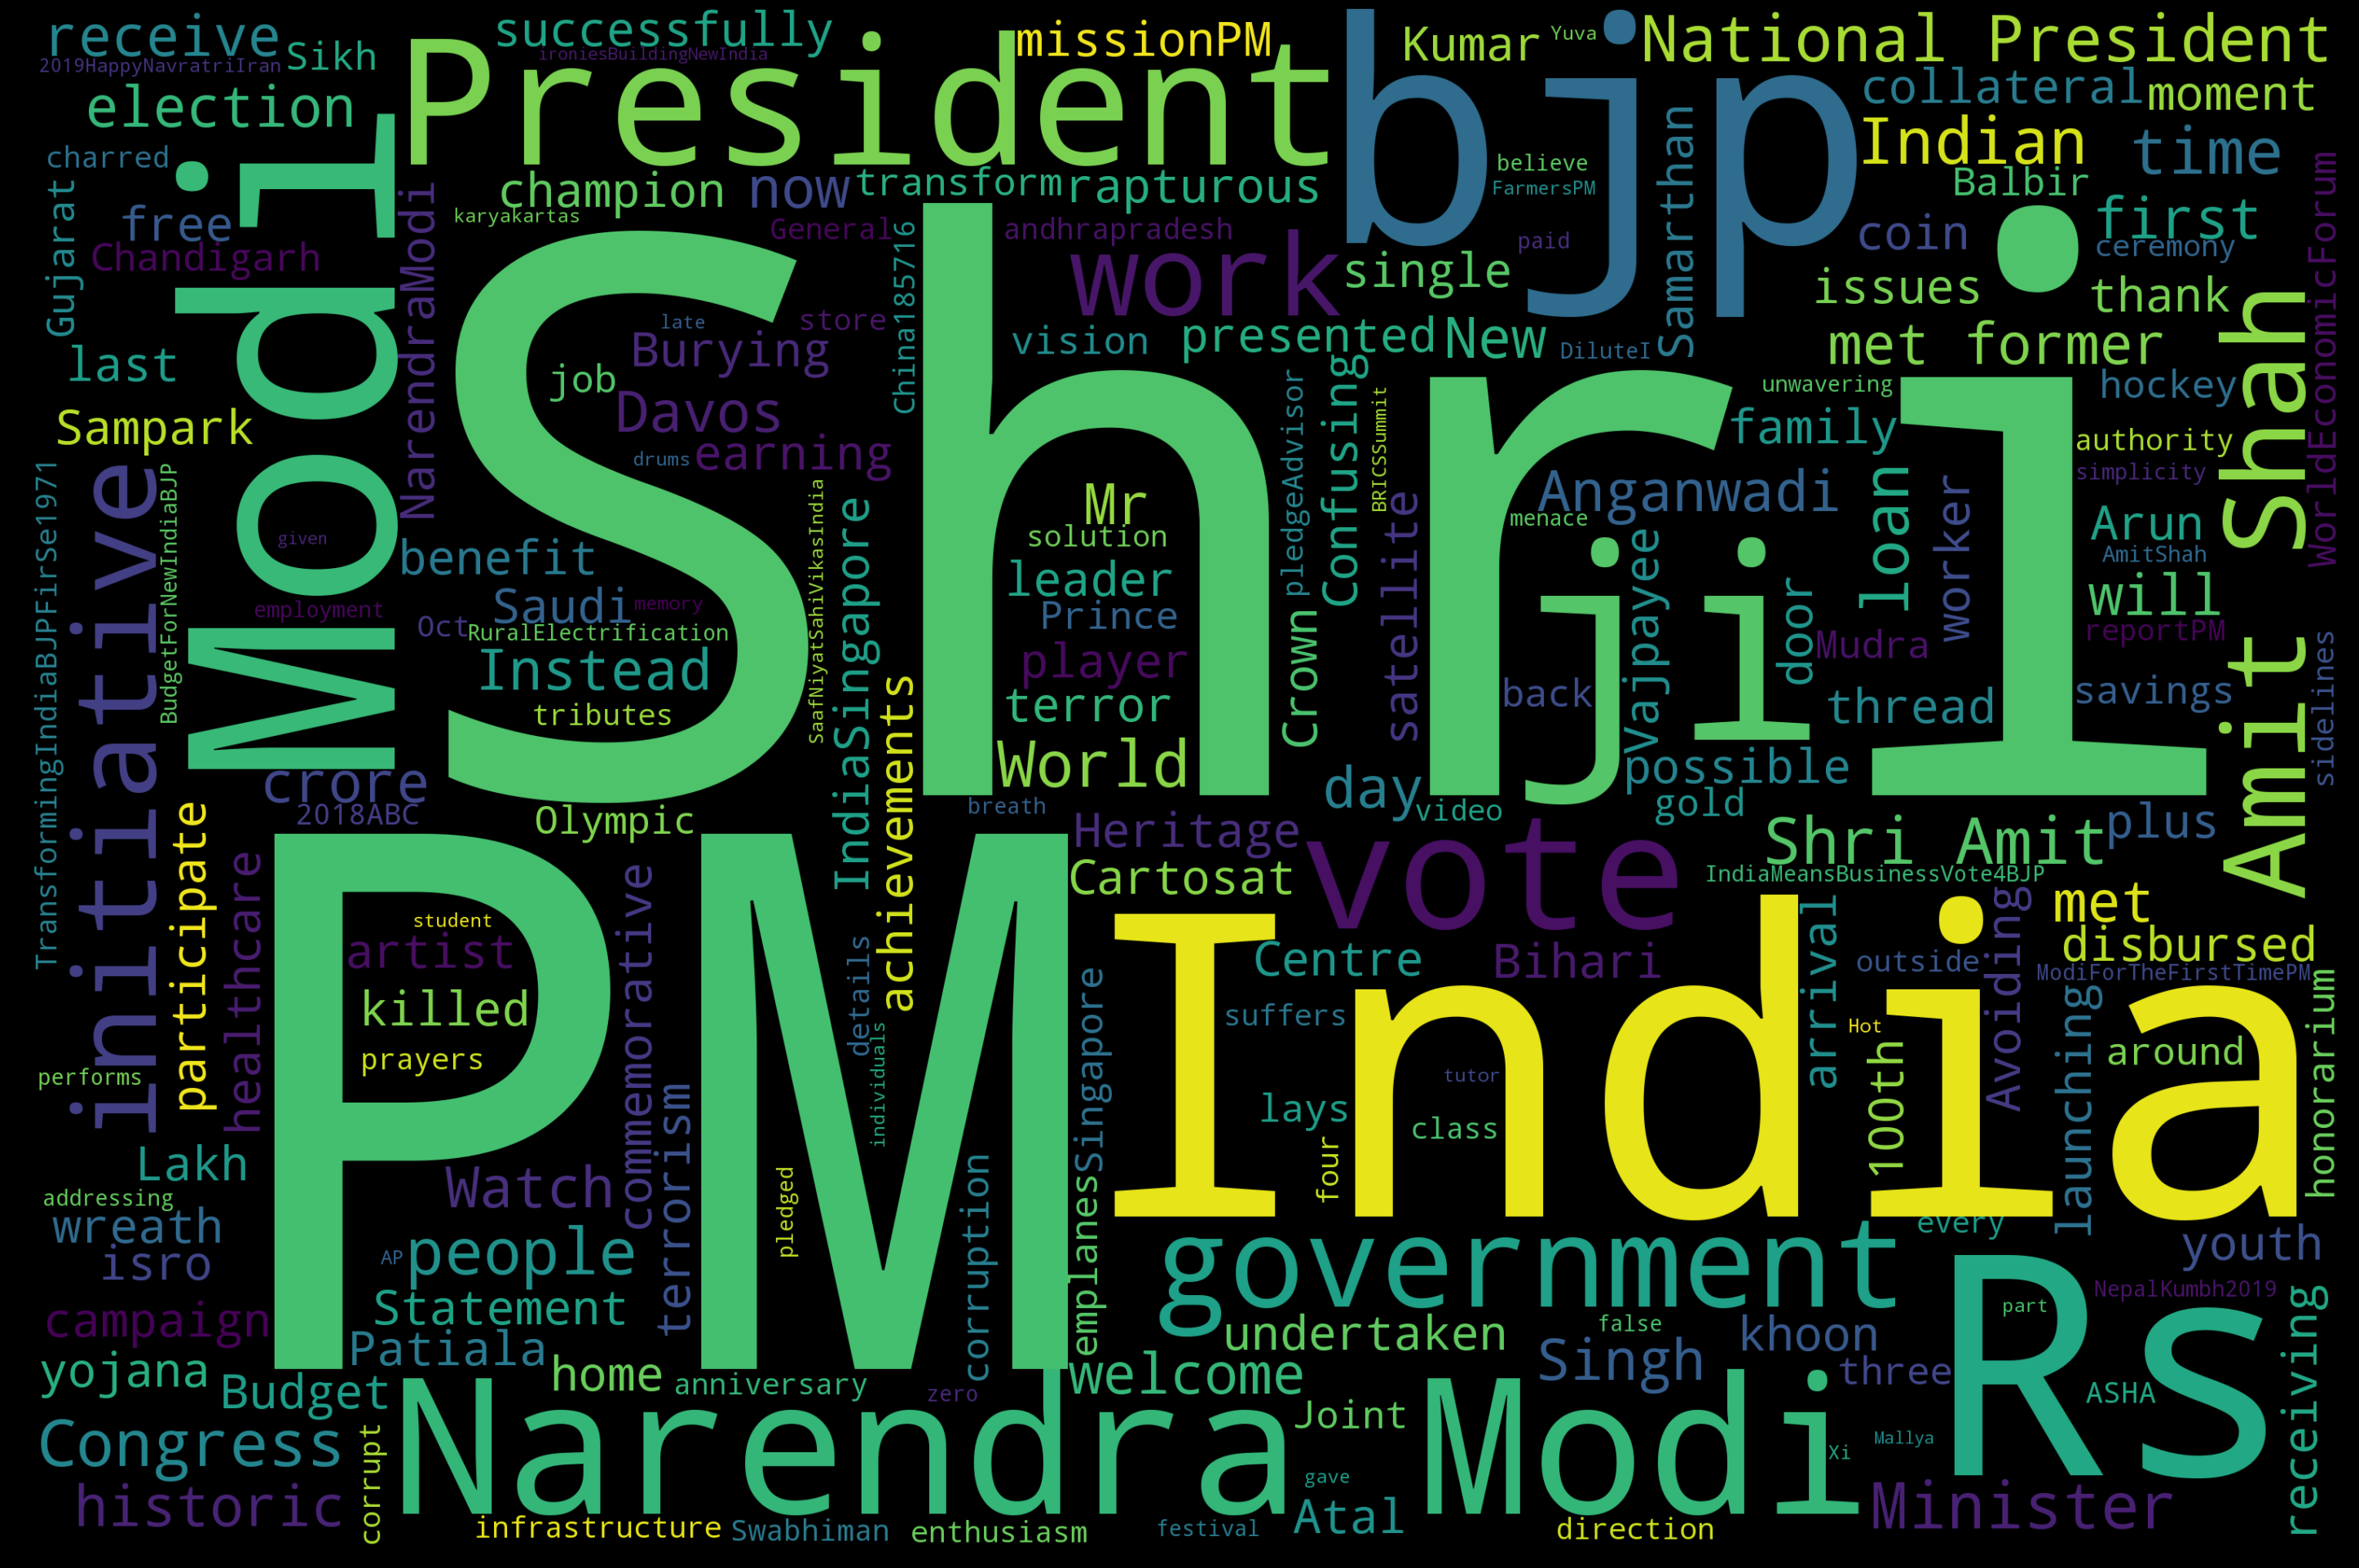

In [14]:
text_content = ''
for k in top_200_indices:
    try:
        text_content += clean_tweet(obj['posts'][k]['comments']['list'][0]['comment'])
    except:
        pass
wordcloud_plot(text_content,'black')

The most occuring words are:
1. Shri - A title used to give respect to a person. It is because the BJP follows Hinduisitic(Hindu) style of writing.
2. BJP - The name of the party, it is used for emphasis and glorification of the party.
3. leader - Calling themselves strong leaders, especially, Shri Narendra Modi.
4. India - The country of the party, signifies Nationalist feelings of the party.

In [15]:
hash_list = []
for k in obj['posts']:
    if len(k['comments']['list']):
        text = k['comments']['list'][0]['comment']
        hash_list.extend(re.findall(r"#(\w+)", text))
hash_dict = {}
for j in hash_list:
        if j not in hash_dict.keys():
            hash_dict[j] = 1
        else:
            hash_dict[j] += 1
print(dict_sort_des(hash_dict)[:5])

[('bjp', 23), ('india', 16), ('election', 12), ('vote', 10), ('BharatKeMannKiBaat', 7)]


In [16]:
with open('explore_2019-04-14 05-00-26.json', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)

In [17]:
post_list = obj[0]['posts']
top_five_indices = []
for j in range(5):
    max_score = -100
    max_index = -1
    for k in post_list:
#         print(k)
        l = math.log(k['likes']['count']+1) + math.log(k['views']+1)+k['comments']['count']
        if l>max_score:
            max_score = l
            max_index = obj[0]['posts'].index(k)
    top_five_indices.append(obj[0]['posts'][max_index])
    post_list.remove(obj[0]['posts'][max_index])
# print(top_five_indices)

In [18]:
for k in top_five_indices:
    display(Image(value=requests.get(k['preview_img']).content))
    print(k['url'])

https://www.instagram.com/p/BwD_oGYnKSi/
https://www.instagram.com/p/BwM8tY2lcd0/
https://www.instagram.com/p/BwBviGNBcKF/
https://www.instagram.com/p/BwHijZqB7zA/
https://www.instagram.com/p/BwHnEUdncCb/


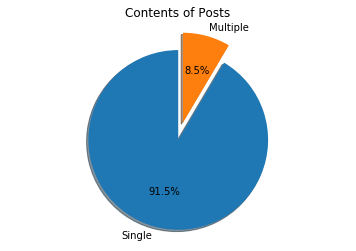

In [19]:
single_count = 0
multiple_count = 0
for k in obj[0]['posts']:
    if (not len(k['imgs'])) or (len(k['imgs'])==1) :
        single_count += 1
    else:
        multiple_count += 1
        
labels = ['Single', 'Multiple']
sizes = [single_count, multiple_count]
explode = (0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('Contents of Posts')
plt.show()